In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=load_breast_cancer()

In [3]:
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
dataset.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
dfcancer=pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
dfcancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
dfcancer.shape

(569, 30)

In [10]:
dfcancer['target']=pd.DataFrame(dataset.target)
dfcancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
x=dfcancer.iloc[:,0:-1]
y=dfcancer.iloc[:,-1]
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [13]:
x.shape

(569, 30)

In [14]:
y.shape

(569,)

In [15]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=45)
train_x.shape

(455, 30)

In [16]:
train_y.shape

(455,)

In [17]:
test_x.shape

(114, 30)

In [18]:
test_y.shape

(114,)

In [19]:
lg=LogisticRegression()
lg.fit(train_x,train_y)

LogisticRegression()

In [20]:
pred=lg.predict(test_x)
print(pred)

[1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1
 1 1 0]


In [21]:
print('accuracyscore',accuracy_score(test_y,pred))

accuracyscore 0.956140350877193


In [22]:
print('confusion matrix', confusion_matrix(test_y,pred))

confusion matrix [[38  4]
 [ 1 71]]


In [23]:
print('classification report',classification_report(test_y,pred))

classification report               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# AUC ROC CURVE

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [25]:
y_pred_prob=lg.predict_proba(test_x)[:,1]
y_pred_prob

array([8.45309198e-01, 1.11225955e-04, 8.07942547e-10, 9.99169434e-01,
       9.99105637e-01, 9.97909348e-01, 9.36345410e-01, 9.98936042e-01,
       9.95898201e-01, 9.96889281e-01, 9.97119758e-01, 7.39898579e-03,
       9.95209443e-01, 9.88987832e-01, 9.98089458e-01, 2.46571433e-06,
       9.95688410e-01, 9.76163342e-01, 9.52878288e-01, 9.98640982e-01,
       9.96087796e-01, 9.99766527e-01, 9.95526483e-01, 9.63257627e-01,
       3.80012205e-04, 9.97293666e-01, 9.84450474e-01, 9.84312502e-01,
       5.79182671e-03, 9.42608146e-01, 9.91811211e-01, 9.99154863e-01,
       9.88199354e-01, 3.13986641e-08, 9.98344727e-01, 9.99541630e-01,
       9.99522561e-01, 9.99817144e-01, 3.42961898e-01, 7.78102960e-04,
       1.72193379e-03, 9.95233519e-01, 9.99751662e-01, 4.65383409e-10,
       9.98116919e-01, 9.98500462e-01, 9.98566063e-01, 3.88890701e-05,
       9.59114875e-01, 9.98916148e-01, 8.61382778e-01, 9.97330450e-01,
       1.01138048e-02, 9.97600408e-01, 9.26776224e-01, 6.46561955e-04,
      

In [26]:
fpr, tpr, threshold=roc_curve(test_y, y_pred_prob)

In [27]:
fpr

array([0.        , 0.        , 0.        , 0.02380952, 0.02380952,
       0.04761905, 0.04761905, 0.07142857, 0.07142857, 0.11904762,
       0.11904762, 1.        ])

In [28]:
tpr

array([0.        , 0.01388889, 0.5       , 0.5       , 0.59722222,
       0.59722222, 0.875     , 0.875     , 0.98611111, 0.98611111,
       1.        , 1.        ])

In [29]:
threshold

array([1.99988800e+00, 9.99888002e-01, 9.95795636e-01, 9.95688410e-01,
       9.91960292e-01, 9.91811211e-01, 9.36345410e-01, 9.34830704e-01,
       8.45309198e-01, 4.97225846e-01, 3.95622725e-01, 1.78759480e-21])

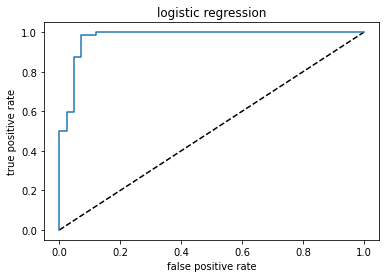

In [30]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='logistic regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('logistic regression')
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt= DecisionTreeClassifier()
dt.fit(train_x, train_y)
p=dt.predict(test_x)
ac=accuracy_score(test_y,p)
round(ac,3)

0.93

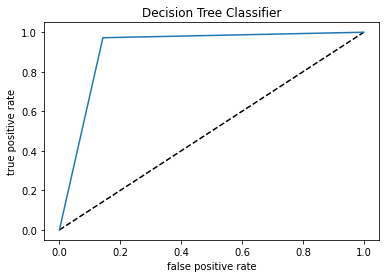

In [34]:
y_pred_prob=dt.predict_proba(test_x)[:,1]
fpr, tpr, threshold=roc_curve(test_y, y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree Classifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Decision Tree Classifier')
plt.show()